# SqlAlchemy

Jeffrey Box

## Notes:

1. All matplotlib images save to the Images folder
2. The Flask application runs at the bottom of this notebook to save a step in execution
3. There are several different ways to extract tuples into lists - I note multiple methods that I use

In [98]:
# Dependencies 
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import distinct
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [99]:
# Create the sqlalchemy engine object which 'references both a Dialect and a Pool, 
# which together interpret the DBAPI’s module functions as well as the behavior of the database'
# This is done by referencing the local .sqlite file in the repository
# http://docs.sqlalchemy.org/en/latest/core/engines.html
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Check engine
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [100]:
# Reflect an existing database into a new model using the automap_base() method imported above
Base = automap_base()

# Reflect the tables using the prepare 
Base.prepare(engine, reflect=True)

# Check base
Base

sqlalchemy.ext.automap.Base

In [101]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Check session
session

In [102]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [103]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [104]:
# Columns in 'Measurement'
Measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [105]:
# Columns in 'Station'
Station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

# Exploratory Climate Analysis

In [106]:
# Calculate the date 1 year ago from today

#datetime functions
today = dt.date.today()
print(f'Today via datetime: {today}')
one_year = dt.timedelta(days=365)
last_year = today - one_year
print(f'Last year via datetime: {last_year}')

#db
maxdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'The "latest" in the db in tuple/string format: {maxdate}')

#converted
max_date_db = dt.datetime.strptime(maxdate[0], '%Y-%m-%d').date()
print(f'did this work...? {max_date_db}')

print("SURE DID")

#destringifying and arethmeticking the tuple
last_year_db = max_date_db-one_year
print(f'Extracting and formatting 12 months ago in the db: {last_year_db}')


#last_year_db = maxdate[0]-one_year
#print(f'Extracting and formatting 12 months ago in the db: {last_year_db}'
type(last_year_db)

Today via datetime: 2018-08-27
Last year via datetime: 2017-08-27
The "latest" in the db in tuple/string format: ('2017-08-23',)
did this work...? 2017-08-23
SURE DID
Extracting and formatting 12 months ago in the db: 2016-08-23


datetime.date

In [107]:
# Query data
year_data_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year_db).\
    order_by(Measurement.date).all()

print(len(year_data_query))
print(year_data_query)

2230
[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 

In [108]:
# Save the query results as a Pandas DataFrame and (inline fcns) set the index to the date column
year_data_df = pd.DataFrame(year_data_query).set_index('date').dropna().sort_values('date',ascending=True)
print(len(year_data_df))
year_data_df.head()

2021


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


<IPython.core.display.Javascript object>


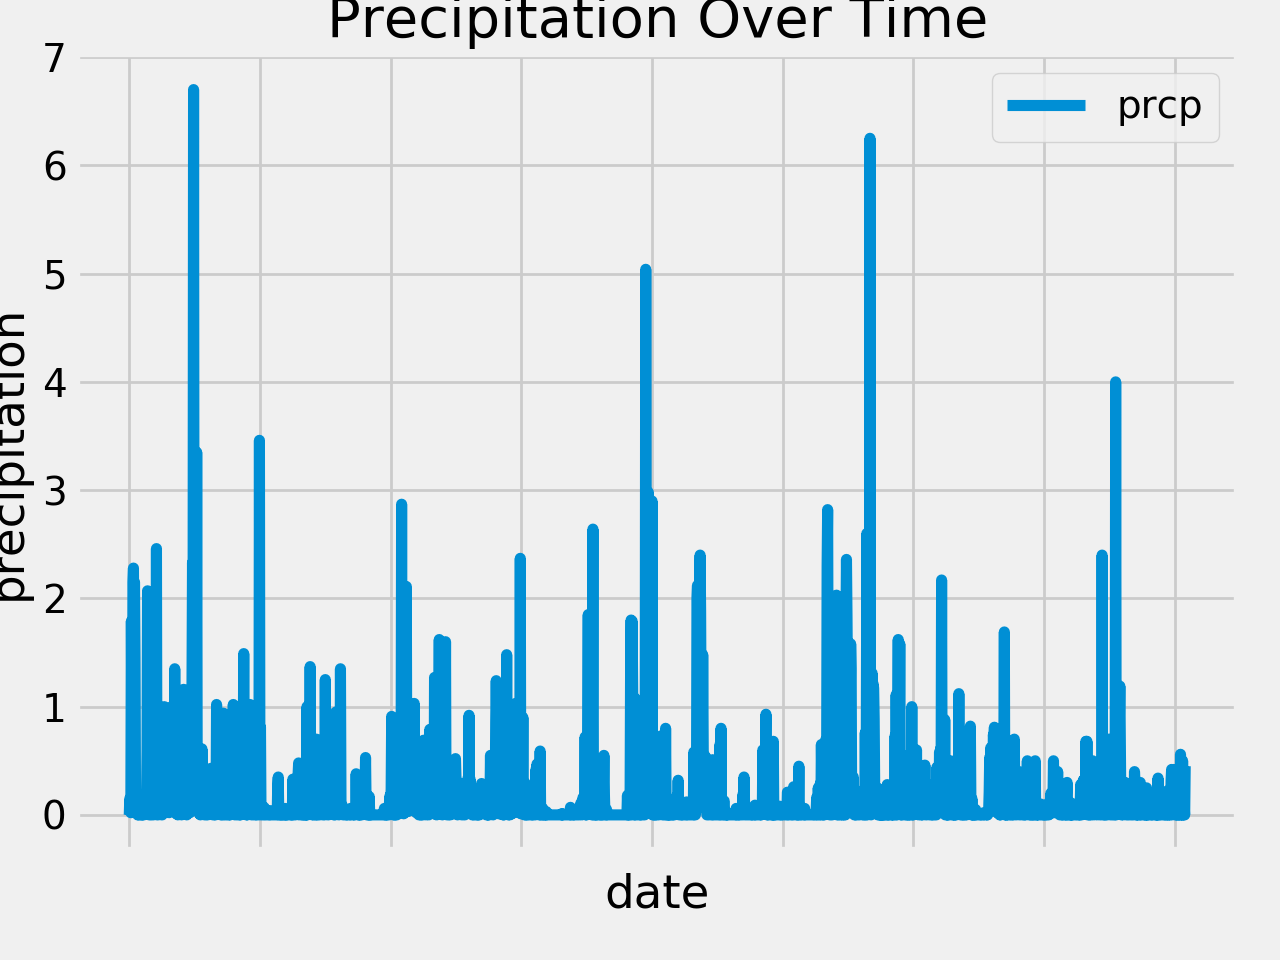

In [109]:
year_data_df.plot.line()
plt.tight_layout()
plt.ylabel("precipitation")
plt.title("Precipitation Over Time")
plt.show()
plt.savefig('Images/prcp_time.png')

In [110]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_sum = round(year_data_df['prcp'].sum(),2)
print(f'rain_sum {rain_sum}')
rain_mean = round(year_data_df['prcp'].mean(),2)
print(f'rain_mean {rain_mean}')
rain_std = round(year_data_df['prcp'].std(),2)
print(f'rain_std {rain_std}')
rain_min = round(year_data_df['prcp'].min(),2)
print(f'rain_min {rain_min}')
rain_max = round(year_data_df['prcp'].max(),2)
print(f'rain_max: {rain_max}')
rain_q1, rain_q3 = np.percentile(year_data_df, [75,25])
print(f'rain_q1 {rain_q1}')
print(f'rain_q3 {rain_q3}')

# second method using describe... problem is this gives us a count of rows and not total sum of precip inches
describe_df = pd.DataFrame(year_data_df['prcp'].describe())
describe_df

rain_sum 358.28
rain_mean 0.18
rain_std 0.46
rain_min 0.0
rain_max: 6.7
rain_q1 0.13
rain_q3 0.0


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [111]:
# Create a manual dataframe with needed values 

summary_df = pd.DataFrame({'sum': [rain_sum], 'mean': [rain_mean], \
                           'std':[rain_std], 'min':[rain_min],\
                           '25%':[rain_q1],'mean':[rain_mean],\
                           '75%':[rain_q3],'max':[rain_max]})
summary_df = summary_df.T
summary_df = summary_df.rename(columns={0:'Precipitation'})
summary_df

,Precipitation
sum,358.28
mean,0.18
std,0.46
min,0.00
25%,0.13
75%,0.00
max,6.70


In [112]:
# How many stations are available in this dataset?
session.query(func.count(distinct(Measurement.station))).all()

[(9)]

In [113]:
# What are the most active stations?
# List the stations and the counts in descending order.
station_query = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

print(station_query)

topstation_query = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

print(topstation_query[0])

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
USC00519281


In [114]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_query = stemp_query = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == topstation_query[0]).\
    group_by(Measurement.station).all()   
print(temp_query)

[(54.0, 85.0, 71.66378066378067)]


In [115]:
# Choose the station with the highest number of temperature observations. 
# Query the last 12 months of temperature observation data for this station
topstationtemp_query = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == topstation_query[0]).\
    filter(Measurement.date >= last_year_db).\
    order_by(Measurement.date).all()  

# convert to pandas dataframe
topstationtemp_df = pd.DataFrame(topstationtemp_query).set_index('date').dropna()

# show head
topstationtemp_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


<IPython.core.display.Javascript object>


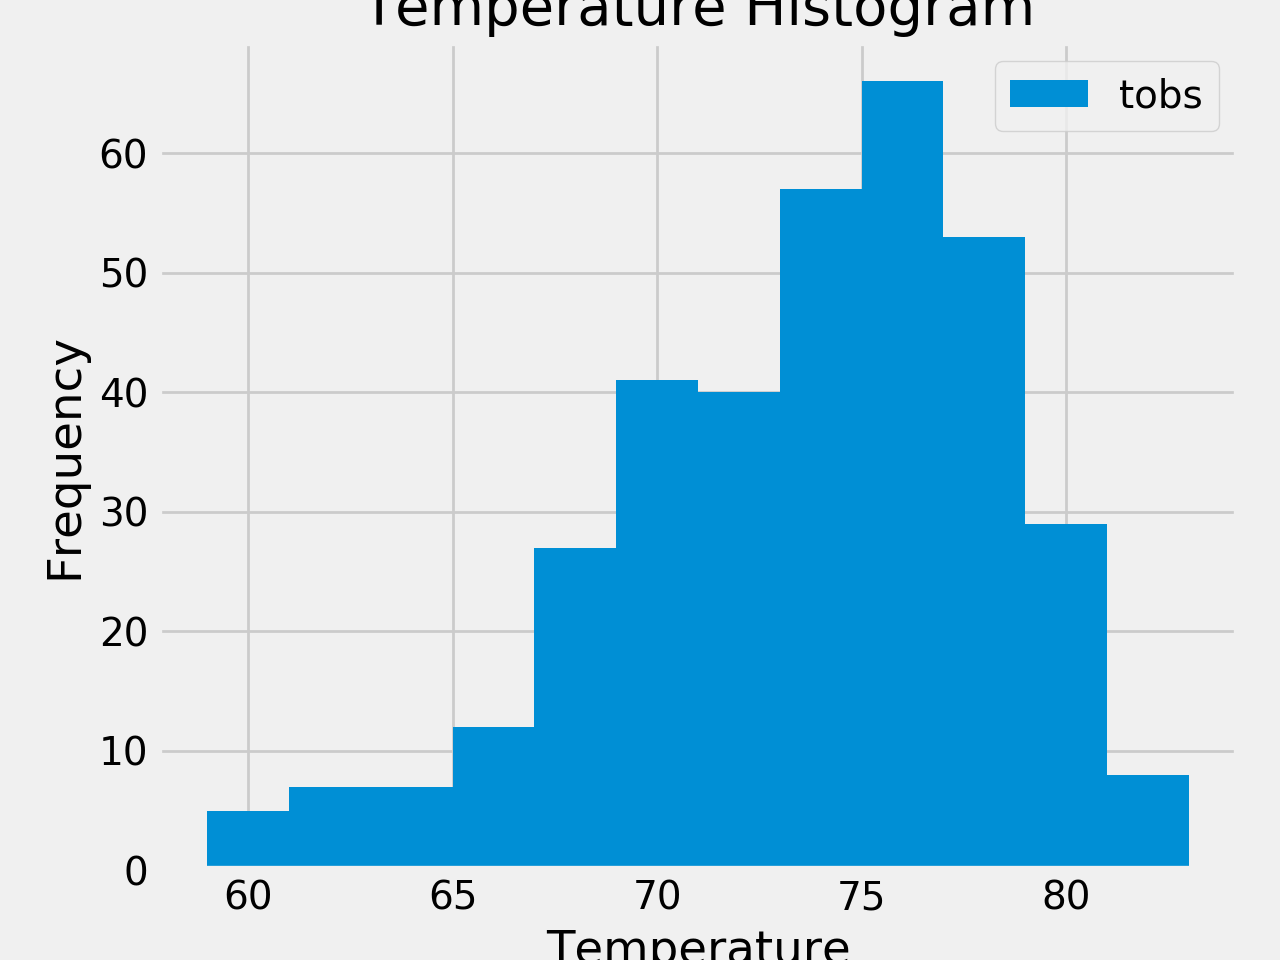

In [116]:
#... and plot the results as a histogram
topstationtemp_df.plot.hist(bins=12)
plt.tight_layout()
plt.title("Temperature Histogram")
plt.xlabel("Temperature")
plt.show()
plt.savefig('Images/temp_hist.png')

In [117]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [118]:
# Test
calc_temps('2015-01-01','2017-01-01')

[(56.0, 73.99303062302006, 86.0)]

In [119]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps(last_year_db, max_date_db)

[(58.0, 74.59058295964125, 87.0)]

min 58.0, avg 74.59, max 87.0


<IPython.core.display.Javascript object>


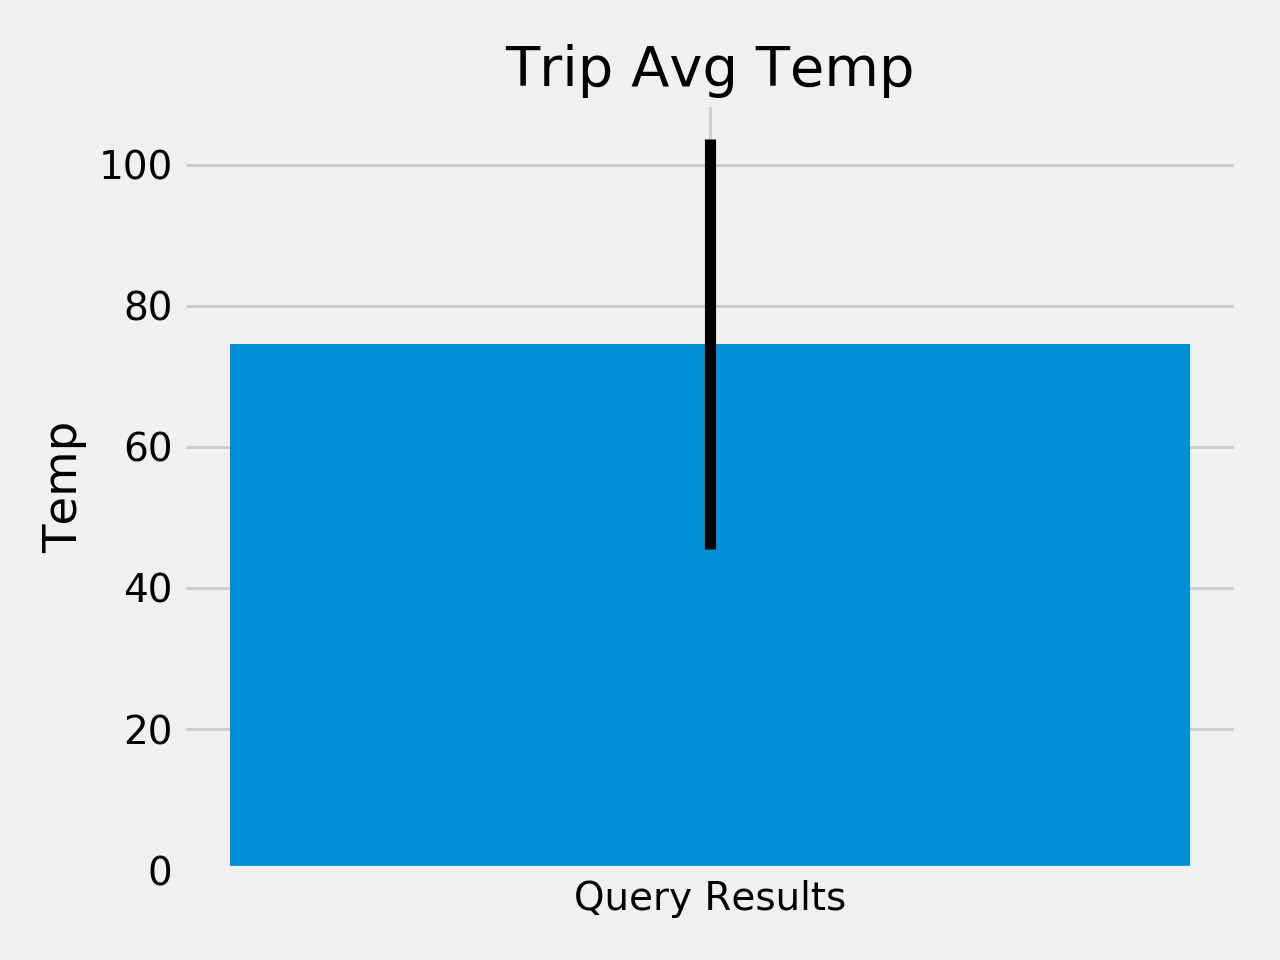

In [120]:
# Plot the results from your previous query as a bar chart. 
trip_arr = calc_temps(last_year_db,max_date_db)
trip_min = trip_arr[0][0]
trip_avg = round(trip_arr[0][1],2)
trip_max = trip_arr[0][2]
print(f'min {trip_min}, avg {trip_avg}, max {trip_max}')

# Matplotlib subplot
fig, ax = plt.subplots()

# Use the average temperature for the y value Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(0, trip_avg, yerr=(trip_max - trip_min), label="Query Results")

# Create the ticks for our bar chart's x axis
x_axis_labels = ["Query Results"]
x_axis = np.arange(len(x_axis_labels))
tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels(x_axis_labels)


# Use "Trip Avg Temp" as your Title
ax.set_ylabel('Temp')
ax.set_title('Trip Avg Temp')
plt.tight_layout()
plt.show()
plt.savefig('Images/summary_plot.png')

In [121]:
session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= last_year_db).\
    group_by(Measurement.station).all()

[('2017-07-31', 77.0),
 ('2017-08-23', 82.0),
 ('2017-08-23', 76.0),
 ('2017-07-31', 81.0),
 ('2017-08-18', 79.0),
 ('2017-08-23', 81.0),
 ('2017-08-23', 82.0)]

In [122]:
# Testing joins

session.query(Measurement.station,Station.name).\
    filter(Measurement.station==Station.station).first()

('USC00519397', 'WAIKIKI 717.2, HI US')

In [123]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

summary_qry = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,\
              func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
        filter(Measurement.date >= last_year_db).filter(Measurement.date <= max_date_db).\
        filter(Measurement.station == Station.station).\
        group_by(Station.station).all()

for s in summary_qry:
    print(s)

('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 61.0, 73.27696793002916, 82.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 63.0, 77.16065573770491, 83.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 58.0, 72.09169054441261, 82.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 62.0, 74.78142076502732, 87.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 59.0, 73.10795454545455, 83.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 60.0, 75.21052631578948, 87.0)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 60.0, 76.97032640949556, 85.0)


## Optional Challenge Assignment

- Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.
- (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
- You are provided with a function called daily_normals that will calculate the daily normals for a specific date.
- This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.
- Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.
- Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
- Use Pandas to plot an area plot (stacked=False) for the daily normals.

In [124]:
# This method was provided 

def daily_normals(date):
    """Daily Normals.
    Args:
        date (str): A date string in the format '%m-%d'
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tma
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [125]:
# Understanding the provided query
session.query(Measurement.date).filter(func.strftime("%m-%d", Measurement.date)=='01-01').all()

[('2010-01-01'),
 ('2011-01-01'),
 ('2012-01-01'),
 ('2013-01-01'),
 ('2014-01-01'),
 ('2015-01-01'),
 ('2016-01-01'),
 ('2017-01-01'),
 ('2010-01-01'),
 ('2011-01-01'),
 ('2012-01-01'),
 ('2013-01-01'),
 ('2014-01-01'),
 ('2015-01-01'),
 ('2016-01-01'),
 ('2017-01-01'),
 ('2011-01-01'),
 ('2012-01-01'),
 ('2015-01-01'),
 ('2016-01-01'),
 ('2017-01-01'),
 ('2010-01-01'),
 ('2010-01-01'),
 ('2011-01-01'),
 ('2012-01-01'),
 ('2013-01-01'),
 ('2014-01-01'),
 ('2015-01-01'),
 ('2016-01-01'),
 ('2017-01-01'),
 ('2010-01-01'),
 ('2011-01-01'),
 ('2012-01-01'),
 ('2013-01-01'),
 ('2014-01-01'),
 ('2015-01-01'),
 ('2016-01-01'),
 ('2017-01-01'),
 ('2010-01-01'),
 ('2011-01-01'),
 ('2012-01-01'),
 ('2013-01-01'),
 ('2014-01-01'),
 ('2015-01-01'),
 ('2010-01-01'),
 ('2011-01-01'),
 ('2012-01-01'),
 ('2013-01-01'),
 ('2014-01-01'),
 ('2015-01-01'),
 ('2016-01-01'),
 ('2017-01-01')]

In [126]:
# Use the start and end date to create a range of dates (using the dates we already have)
one_day = dt.timedelta(days=1)
trip_range = (max_date_db-last_year_db).days
trip_array = []

# Set some initial variables for the trip array loop
x = 0
save_the_date = last_year_db

# Run a tricky little while loop that creates an array of dates
while x < trip_range:
    # Stip off the year and save a list of %m-%d strings
    placeholder = save_the_date.strftime("%Y-%m-%d").split('-', 1)
    trip_array.append(placeholder[1])
    save_the_date = save_the_date+one_day
    x = x+1

print(trip_array)

['08-23', '08-24', '08-25', '08-26', '08-27', '08-28', '08-29', '08-30', '08-31', '09-01', '09-02', '09-03', '09-04', '09-05', '09-06', '09-07', '09-08', '09-09', '09-10', '09-11', '09-12', '09-13', '09-14', '09-15', '09-16', '09-17', '09-18', '09-19', '09-20', '09-21', '09-22', '09-23', '09-24', '09-25', '09-26', '09-27', '09-28', '09-29', '09-30', '10-01', '10-02', '10-03', '10-04', '10-05', '10-06', '10-07', '10-08', '10-09', '10-10', '10-11', '10-12', '10-13', '10-14', '10-15', '10-16', '10-17', '10-18', '10-19', '10-20', '10-21', '10-22', '10-23', '10-24', '10-25', '10-26', '10-27', '10-28', '10-29', '10-30', '10-31', '11-01', '11-02', '11-03', '11-04', '11-05', '11-06', '11-07', '11-08', '11-09', '11-10', '11-11', '11-12', '11-13', '11-14', '11-15', '11-16', '11-17', '11-18', '11-19', '11-20', '11-21', '11-22', '11-23', '11-24', '11-25', '11-26', '11-27', '11-28', '11-29', '11-30', '12-01', '12-02', '12-03', '12-04', '12-05', '12-06', '12-07', '12-08', '12-09', '12-10', '12-11', 

In [127]:
# confirming this var is still a datetime object
max_date_db

datetime.date(2017, 8, 23)

In [128]:
# push each tuple of calculations into a list called `normals`
normals = []

# Loop through the list of %m-%d strings and calculate the normals for each date
for date in trip_array:
    output = daily_normals(date)
    #output = output[0]
    normals.append(output)
    
print(type(normals))
print(normals)

<class 'list'>
[[(67.0, 76.6923076923077, 87.0)], [(70.0, 75.96153846153847, 84.0)], [(69.0, 76.96078431372548, 82.0)], [(71.0, 76.56862745098039, 84.0)], [(68.0, 76.28301886792453, 84.0)], [(67.0, 76.73469387755102, 86.0)], [(70.0, 76.23529411764706, 85.0)], [(68.0, 76.41666666666667, 84.0)], [(67.0, 76.84, 85.0)], [(69.0, 77.0, 82.0)], [(67.0, 76.66666666666667, 83.0)], [(69.0, 76.13725490196079, 83.0)], [(68.0, 76.27083333333333, 84.0)], [(66.0, 75.91489361702128, 84.0)], [(66.0, 74.91111111111111, 81.0)], [(64.0, 75.18, 82.0)], [(66.0, 76.22222222222223, 83.0)], [(68.0, 76.36538461538461, 84.0)], [(67.0, 76.61224489795919, 85.0)], [(70.0, 76.69565217391305, 83.0)], [(68.0, 75.89795918367346, 85.0)], [(68.0, 75.875, 82.0)], [(69.0, 75.98076923076923, 85.0)], [(67.0, 76.14, 81.0)], [(70.0, 77.40384615384616, 86.0)], [(68.0, 76.57692307692308, 83.0)], [(67.0, 75.85106382978724, 84.0)], [(68.0, 76.34693877551021, 87.0)], [(69.0, 76.14583333333333, 83.0)], [(67.0, 76.44897959183673, 84.

In [129]:
dates_df = pd.DataFrame([trip_array]).T
dates_df = dates_df.rename(columns={0:'Date'})
print(len(dates_df))
dates_df.head()

365


,Date
0,08-23
1,08-24
2,08-25
3,08-26
4,08-27


In [130]:
normals_df = pd.DataFrame(normals)
normals_df[['min', 'avg','max']] = normals_df[0].apply(pd.Series)
del normals_df[0]
print(len(normals_df))
normals_df = pd.concat([dates_df, normals_df], axis=1).set_index('Date')
normals_df.head()

365


,min,avg,max
Date,,,
08-23,67.0,76.692308,87.0
08-24,70.0,75.961538,84.0
08-25,69.0,76.960784,82.0
08-26,71.0,76.568627,84.0
08-27,68.0,76.283019,84.0


In [131]:
# This is another method I discovered late in the game
# To create a list of lists from a list of tuples, I loop twice. 
# I use this process in the flask app.py

# results_list = []
# for x in normals:
#     results_list.append(x[0])

# results_list2 = []
# for x in results_list:
#     min = x[0]
#     avg = x[1]
#     max = x[2]
#     results_list2.append([min,avg,max])

# results_list2

<IPython.core.display.Javascript object>


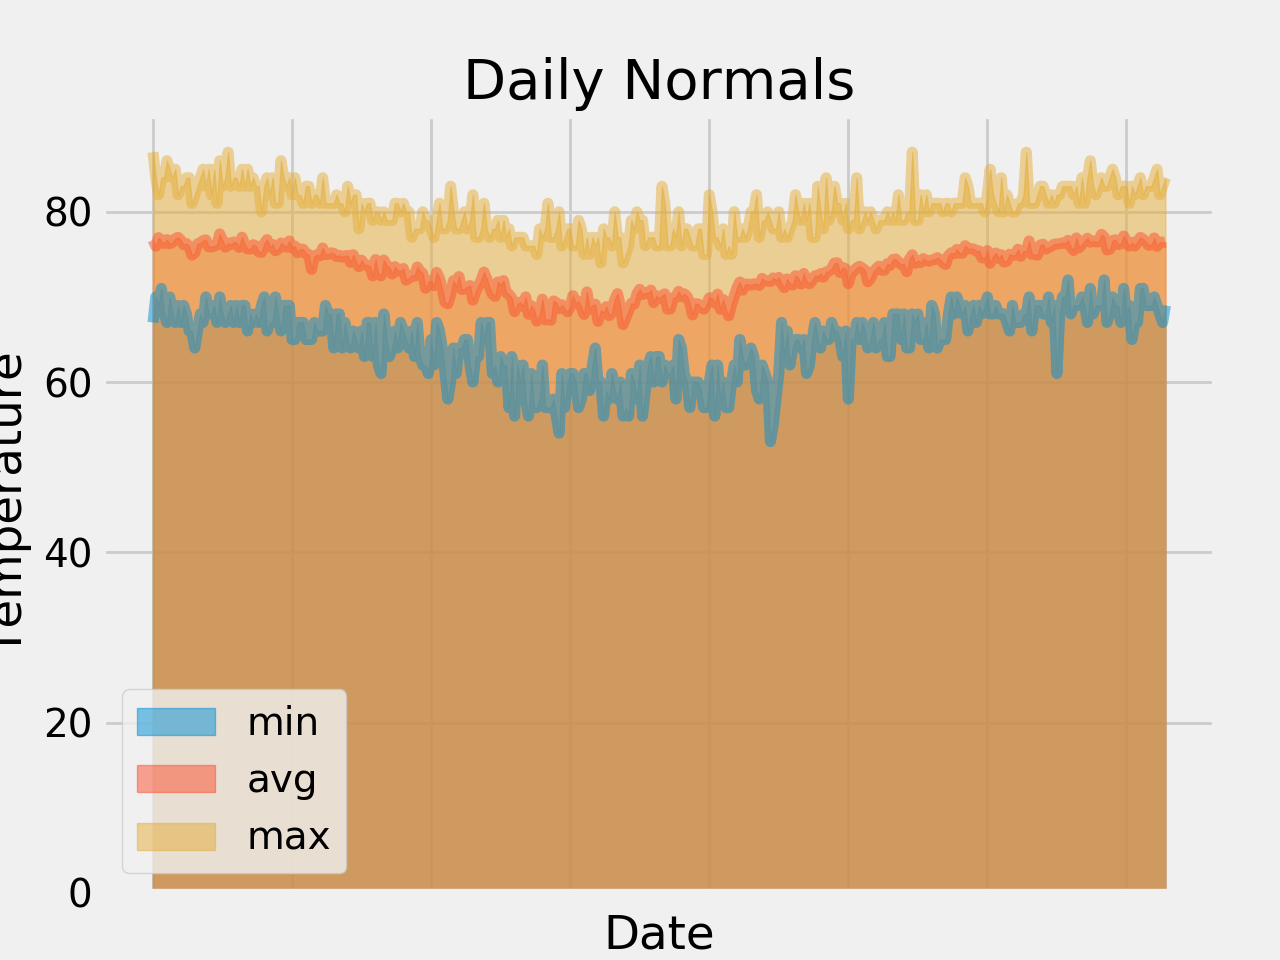

In [132]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False)
plt.title("Daily Normals")
plt.ylabel("Temperature")
plt.savefig('Images/daily_normals.png')

# FLASK

In [ ]:
!python app.py

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 148-531-207
127.0.0.1 - - [27/Aug/2018 17:59:07] "GET / HTTP/1.1" 200 -
